# Randon Pairing vs Power Pairing e Page Rank vs Trivial Rank
Neste documento, queremos investigar qual é o melhor jeito de fazer o rankeamento e o pairing, para o IV Open Minas. Usamos os parâmetros pertinentes ao Torneio: 16 classificados, 3 rodadas e 48 debatedores.

O objetivo é que os 8 melhores debatedores passem de fase com a menor variância para o 8º colocado. Também objetivamos que cada debate (sala) seja mais equilibrado quanto o possível. Talvez algunas destes requisitos entrem em conflito entre si.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import random

In [2]:
duplas = 48
rodadas = 3
teste = 1000
sigma = 0.05

In [3]:
power = [random.random() for i in range(duplas)]
power.sort(reverse=True)

## Paring aleatório e trivial rank

In [4]:
def campeonato_aleatorio_padrao(power, rodadas): #Trivial Rank, Random Pairing
    global Avar
    duplas = len(power)
    tabela = [[0,0] for i in range(duplas)]
    def gerar_rodada_aleatoria(duplas): 
        numeros = list(range(duplas))
        random.shuffle(numeros)
        rodada = [[]]
        while len(numeros) != 0:
            if len(rodada[-1]) != 4:
                rodada[-1].append(numeros.pop())
            else:
                rodada.append([])
        return rodada
    for i in range(rodadas):
        rodada = gerar_rodada_aleatoria(duplas)
        for sala in rodada:
            A = [(power[dupla]+sigma*np.random.randn(), dupla) for dupla in sala]
            azinho = [i[0] for i in A]
            Avar += np.var(azinho)
            A.sort(key = lambda x: x[1])
            tabela[A[0][1]][0] += 3
            tabela[A[0][1]][1] += A[0][0]
            tabela[A[1][1]][0] += 2
            tabela[A[1][1]][1] += A[1][0]
            tabela[A[2][1]][0] += 1
            tabela[A[2][1]][1] += A[2][0]
            tabela[A[3][1]][1] += A[3][0]
    return tabela

In [5]:
A = [[] for i in range(duplas)]
Avar = 0 #variância das partidas
for i in range(teste):
    tabela = campeonato_aleatorio_padrao(power, rodadas) #executa um campeonato e gera a tabela
    tabela1 = [(tabela[i][0], tabela[i][1], i) for i in range(len(tabela))] #ordena
    tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
    tabela2 = tabela[:]
    tabela2.sort(key=lambda x: (x[0], x[1]), reverse=True)
    n = 0
    for item in tabela1:
        A[item[2]].append(n)
        n += 1
Avar/(teste*duplas) #Variância média das salas. Mede o quanto que neste modelo de campeonato o nível das duplas é díspar.

0.05326035725393239

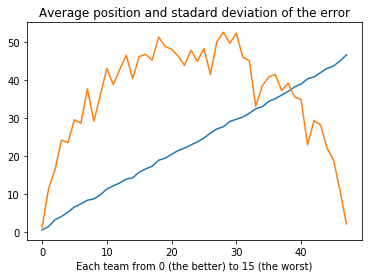

In [6]:
a_ = [[(item - A.index(lista1))**2 for item in lista1] for lista1 in A]
a = [(sum(item)/len(item), (np.var(a_[A.index(item)]))**0.5 ) for item in A]
plt.plot(a)
plt.xlabel('Each team from 0 (the better) to 15 (the worst)')
plt.title('Average position and stadard deviation of the error')
plt.show()

Verificamos como o erro 

In [7]:
sum([np.average(item) for item in a_]) #Soma dos erros ao quadrado

1031.054

In [8]:
sum([(np.var(item))**0.5 for item in a_]) #Soma do desvio padrão do erro para todos debatedores

1736.5844539123761

In [9]:
a[15][0]+1 #Posição média do 16º melhor time

16.715

In [10]:
(np.var(a_[15]))**0.5 #Desvio padrão do erro 16º melhor debatedor.

46.10525339915182

## Power paring, trivial ranking
### Caso 1: Primeira rodada aleatória, demais por power paring.

In [11]:
def campeonato_power_paired_rank_padrao(power, rodadas):
    global Bvar
    duplas = len(power)
    tabela = [[0,0] for i in range(duplas)]
    def gerar_rodada_power_paired(duplas, tabela): 
        if sum([sum(x) for x in tabela])== 0:
            numeros = list(range(duplas))
            random.shuffle(numeros)
            rodada = [[]]
            while len(numeros) != 0:
                if len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
        else:
            tabela1 = [(tabela[i][0], tabela[i][1], i) for i in range(duplas)]
            tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
            numeros = [i[2] for i in tabela1]
            rodada = [[]] 
            while len(numeros) != 0:
                if len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
    for i in range(rodadas):
        rodada = gerar_rodada_power_paired(duplas, tabela)
        for sala in rodada:
            A = [(power[dupla]+sigma*np.random.randn(), dupla) for dupla in sala]
            azinho = [i[0] for i in A]
            Bvar += np.var(azinho)
            A.sort(key = lambda x: x[1])
            tabela[A[0][1]][0] += 3
            tabela[A[0][1]][1] += A[0][0]
            tabela[A[1][1]][0] += 2
            tabela[A[1][1]][1] += A[1][0]
            tabela[A[2][1]][0] += 1
            tabela[A[2][1]][1] += A[2][0]
            tabela[A[3][1]][1] += A[3][0]
    return tabela

In [12]:
B = [[] for i in range(duplas)]
Bvar = 0
for i in range(teste):
    tabela = campeonato_power_paired_rank_padrao(power, rodadas) #executa um campeonato e gera a tabela
    tabela1 = [(tabela[i][0], tabela[i][1], i) for i in range(len(tabela))] #ordena
    tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
    tabela2 = tabela[:]
    tabela2.sort(key=lambda x: (x[0], x[1]), reverse=True)
    n = 0
    for item in tabela1:
        B[item[2]].append(n)
        n += 1
Bvar/(teste*duplas) #mostra a variância média das partidas neste modelo de campeonato

0.026575408983840865

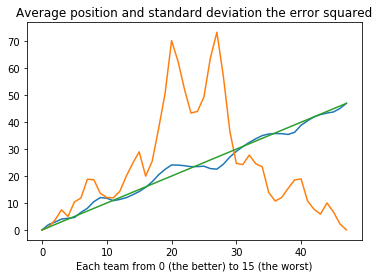

In [13]:
b_ = [[(item - B.index(lista1))**2 for item in lista1] for lista1 in B]
b = [(sum(item)/len(item), (np.var(b_[B.index(item)]))**0.5, B.index(item)) for item in B]
plt.plot(b)
plt.xlabel('Each team from 0 (the better) to 15 (the worst)')
plt.title('Average position and standard deviation the error squared')
plt.show()

In [14]:
sum([np.average(item) for item in b_]) #Soma dos erros ao quadrado

865.2420000000001

É interessante que a variância seja menor justamente no break e mesmo havendo algumas duplas que não ficam no seu lugar de fato na maioria das vezes, é pouco importante porque acontece justamente longe do break.

In [15]:
sum([(np.var(item))**0.5 for item in b_]) #Soma dos desvios padrão dos erros com relação à posição correta

1146.380626096898

In [16]:
(np.var(b_[15]))**0.5 #Desvio padrão do erro do 16º colocado com relação à posição correta.

28.9936914517624

In [17]:
b[15][0]+1 #posição média do 16º time

15.246

Aqui a variância total do campeonato é menor que no outro caso.

# Campeonato Comum + Pairing por reputação

In [18]:
def campeonato_power_paired_rank_padrao(power, rodadas):
    global Dvar
    duplas = len(power)
    tabela = [[0,0] for i in range(duplas)]
    def gerar_rodada_power_paired(duplas, tabela): 
        if sum([sum(x) for x in tabela])== 0:
            tabela1 = [(tabela[i][0], (0.1*np.random.randn()+power[i]), i) for i in range(duplas)]
            tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
            numeros0 = []
            k = len(tabela1)
            while len(numeros0) < 0.25*k:
                a = tabela1.pop(0)
                numeros0.append(a[2])
            numeros = [i[2] for i in tabela1]
            random.shuffle(numeros)
            rodada = [[]] 
            while (len(numeros)+len(numeros0)) != 0:
                if len(rodada[-1]) == 0:
                    rodada[-1].append(numeros0.pop())
                elif len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
        else:
            tabela1 = [(tabela[i][0], tabela[i][1], i) for i in range(duplas)]
            tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
            numeros = [i[2] for i in tabela1]
            rodada = [[]] 
            while len(numeros) != 0:
                if len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
    for i in range(rodadas):
        rodada = gerar_rodada_power_paired(duplas, tabela)
        for sala in rodada:
            A = [(power[dupla]+sigma*np.random.randn(), dupla) for dupla in sala]
            A.sort(key = lambda x: x[1])
            azinho = [i[0] for i in A]
            Dvar += np.var(azinho)
            tabela[A[0][1]][0] += 3
            tabela[A[0][1]][1] += A[0][0]
            tabela[A[1][1]][0] += 2
            tabela[A[1][1]][1] += A[1][0]
            tabela[A[2][1]][0] += 1
            tabela[A[2][1]][1] += A[2][0]
            tabela[A[3][1]][1] += A[3][0]
    return tabela

In [19]:
D = [[] for i in range(duplas)]
Dvar = 0
for i in range(teste):
    tabela = campeonato_power_paired_rank_padrao(power, rodadas) #executa um campeonato e gera a tabela
    tabela1 = [(tabela[i][0], tabela[i][1], i) for i in range(len(tabela))] #ordena
    tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
    tabela2 = tabela[:]
    tabela2.sort(key=lambda x: (x[0], x[1]), reverse=True)
    n = 0
    for item in tabela1:
        D[item[2]].append(n)
        n += 1
Dvar/(teste*duplas) #mostra a variância média das partidas neste modelo de campeonato

0.02784652505378688

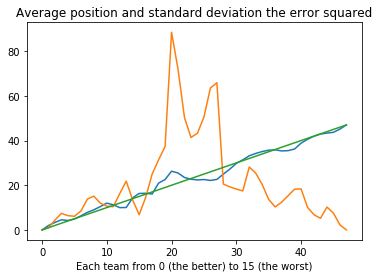

In [20]:
d_ = [[(item - D.index(lista1))**2 for item in lista1] for lista1 in D]
d = [(sum(item)/len(item),(np.var(d_[D.index(item)]))**0.5, D.index(item)) for item in D]
plt.plot(d)
plt.xlabel('Each team from 0 (the better) to 15 (the worst)')
plt.title('Average position and standard deviation the error squared')
plt.show()

In [21]:
sum([np.average(item) for item in d_]) #Soma dos erros ao quadrado

799.1099999999999

In [22]:
sum([(np.var(item))**0.5 for item in d_]) #Soma dos desvios padrão dos erros com relação à posição correta

1017.2302598607877

In [23]:
(np.var(d_[15]))**0.5 #Desvio padrão do erro do 16º colocado com relação à posição correta.

6.8013234006331444

In [24]:
d[15][0]+1 #posição média do 16º time

17.33

# PageRank com reputação

In [25]:
def campeonato_page_rank_paired(power, rodadas):
    global Evar
    duplas = len(power)
    tabela = [[0,0] for i in range(duplas)]
    def gerar_rodada_power_paired(duplas, tabela): 
        if sum([sum(x) for x in tabela])== 0:
            tabela1 = [(tabela[i][0], (0.1*np.random.randn()+power[i]), i) for i in range(duplas)]
            tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
            numeros0 = []
            k = len(tabela1)
            while len(numeros0) < 0.25*k:
                a = tabela1.pop(0)
                numeros0.append(a[2])
            numeros = [i[2] for i in tabela1]
            random.shuffle(numeros)
            rodada = [[]] 
            while (len(numeros)+len(numeros0)) != 0:
                if len(rodada[-1]) == 0:
                    rodada[-1].append(numeros0.pop())
                elif len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
        else:
            tabela1 = [(tabela[i][0], tabela[i][1], i) for i in range(duplas)]
            tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
            numeros = [i[2] for i in tabela1]
            rodada = [[]] 
            while len(numeros) != 0:
                if len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
    ADJ = np.zeros(duplas*duplas)
    ADJ = ADJ.reshape(duplas, duplas)
    for i in range(rodadas):
        rodada = gerar_rodada_power_paired(duplas, tabela)
        for sala in rodada:
            A = [(power[dupla]+sigma*np.random.randn(), dupla) for dupla in sala]
            A.sort(key = lambda x: x[1])
            azinho = [i[0] for i in A]
            ADJ[A[0][1], A[1][1]] += 1
            ADJ[A[0][1], A[2][1]] += 1
            ADJ[A[0][1], A[3][1]] += 1
            ADJ[A[1][1], A[2][1]] += 1
            ADJ[A[1][1], A[3][1]] += 1
            ADJ[A[2][1], A[3][1]] += 1
            Evar += np.var(azinho)
            tabela[A[0][1]][0] += 3
            tabela[A[0][1]][1] += A[0][0]
            tabela[A[1][1]][0] += 2
            tabela[A[1][1]][1] += A[1][0]
            tabela[A[2][1]][0] += 1
            tabela[A[2][1]][1] += A[2][0]
            tabela[A[3][1]][1] += A[3][0]
    G = nx.from_numpy_matrix(ADJ, parallel_edges=True, create_using=nx.DiGraph())
    PR = nx.pagerank(G, alpha=0.9)
    tabelosa = [PR[duplas - i - 1] for i in range(duplas)]
    return tabelosa

In [26]:
E = [[] for i in range(duplas)]
Evar = 0
for i in range(teste):
    tabela = campeonato_page_rank_paired(power, rodadas) #executa um campeonato e gera a tabela
    tabela1 = [(tabela[i], i) for i in range(len(tabela))] #ordena
    tabela1.sort(reverse=True)
    n = 0
    for item in tabela1:
        E[item[1]].append(n)
        n += 1
Evar/(teste*duplas) #mostra a variância média das partidas neste modelo de campeonato

0.02789238141892564

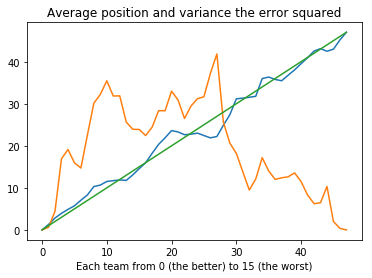

In [27]:
e_ = [[(item - E.index(lista1))**2 for item in lista1] for lista1 in E]
e = [(sum(item)/len(item), (np.var(e_[E.index(item)]))**0.5, E.index(item)) for item in E]
plt.plot(e)
plt.xlabel('Each team from 0 (the better) to 15 (the worst)')
plt.title('Average position and variance the error squared')
plt.show()

In [28]:
sum([(np.var(item))**0.5 for item in e_]) #Soma do desvio padrão dos erros com relação à posição correta

921.4619944902652

In [29]:
sum([np.average(item) for item in e_]) #Soma dos erros ao quadrado

799.654

In [30]:
(np.var(e_[15]))**0.5 #Variância do erro do 16º colocado com relação à posição correta.

23.878800221116638

In [31]:
e[15][0]+1 #posição média do 16º time

15.554

In [32]:
[(e_.index(item) + 1,(np.var(item))**0.5) for item in e_[0:21]] #Desvio padrão para cada uma cada uma das 21 primeiras posições

[(1, 0.0),
 (2, 0.6004256823287958),
 (3, 4.43565091052035),
 (4, 16.89661028135525),
 (5, 19.13121467654367),
 (6, 15.97165536192163),
 (7, 14.71480122189899),
 (8, 22.506127521188535),
 (9, 30.133206666400444),
 (10, 32.2134874703128),
 (11, 35.46375094374536),
 (12, 31.843645755472156),
 (13, 31.87584023990583),
 (14, 25.66254858738703),
 (15, 23.935888619393264),
 (16, 23.878800221116638),
 (17, 22.442318864145925),
 (18, 24.42887013351211),
 (19, 28.355228353868004),
 (20, 28.335362623407523),
 (21, 32.98534824736583)]

# Page rank sem reputação

In [33]:
def campeonato_page_rank_paired_sem_rep(power, rodadas):
    global Fvar
    duplas = len(power)
    tabela = [[0,0] for i in range(duplas)]
    def gerar_rodada_power_paired(duplas, tabela): 
        if sum([sum(x) for x in tabela])== 0:
            numeros = list(range(duplas))
            random.shuffle(numeros)
            rodada = [[]]
            while len(numeros) != 0:
                if len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
        else:
            tabela1 = [(tabela[i][0], tabela[i][1], i) for i in range(duplas)]
            tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
            numeros = [i[2] for i in tabela1]
            rodada = [[]] 
            while len(numeros) != 0:
                if len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
    ADJ = np.zeros(duplas*duplas)
    ADJ = ADJ.reshape(duplas, duplas)
    for i in range(rodadas):
        rodada = gerar_rodada_power_paired(duplas, tabela)
        for sala in rodada:
            A = [(power[dupla]+sigma*np.random.randn(), dupla) for dupla in sala]
            A.sort(key = lambda x: x[1])
            azinho = [i[0] for i in A]
            ADJ[A[0][1], A[1][1]] += 1
            ADJ[A[0][1], A[2][1]] += 1
            ADJ[A[0][1], A[3][1]] += 1
            ADJ[A[1][1], A[2][1]] += 1
            ADJ[A[1][1], A[3][1]] += 1
            ADJ[A[2][1], A[3][1]] += 1
            Fvar += np.var(azinho)
            tabela[A[0][1]][0] += 3
            tabela[A[0][1]][1] += A[0][0]
            tabela[A[1][1]][0] += 2
            tabela[A[1][1]][1] += A[1][0]
            tabela[A[2][1]][0] += 1
            tabela[A[2][1]][1] += A[2][0]
            tabela[A[3][1]][1] += A[3][0]
    G = nx.from_numpy_matrix(ADJ, parallel_edges=True, create_using=nx.DiGraph())
    PR = nx.pagerank(G, alpha=0.9)
    tabelosa = [PR[duplas - i - 1] for i in range(duplas)]
    return tabelosa

In [34]:
F = [[] for i in range(duplas)]
Fvar = 0
clock = 0
for i in range(teste):
    tabela = campeonato_page_rank_paired_sem_rep(power, rodadas) #executa um campeonato e gera a tabela
    tabela1 = [(tabela[i], i) for i in range(len(tabela))] #ordena
    tabela1.sort(reverse=True)
    n = 0
    for item in tabela1:
        F[item[1]].append(n)
        n += 1
Fvar/(teste*duplas) #mostra a variância média das partidas neste modelo de campeonato

0.026402151367292334

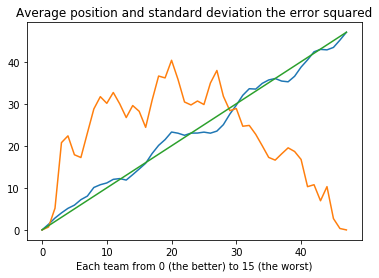

In [35]:
f_ = [[(item - F.index(lista1))**2 for item in lista1] for lista1 in F]
f = [(sum(item)/len(item), (np.var(f_[F.index(item)]))**0.5, F.index(item)) for item in F]
plt.plot(f)
plt.xlabel('Each team from 0 (the better) to 15 (the worst)')
plt.title('Average position and standard deviation the error squared')
plt.show()

In [36]:
sum([(np.var(item))**0.5 for item in f_]) #Soma das variância dos erros com relação à posição correta

1071.5966842057712

In [37]:
sum([np.average(item) for item in f_]) #Soma dos erros ao quadrado

886.9359999999999

In [38]:
f[15][0]+1#posição média do 16º time

15.48

In [39]:
(np.var(f_[15]))**0.5 #Desvio padrão do erro do 16º colocado com relação à posição correta.

28.2037922981999